In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datas=pd.read_csv("tested[1].csv")
datas.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
datas.shape

(418, 12)

In [5]:
datas['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [6]:
datas['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [7]:
datas['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [8]:
datas['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [9]:
datas['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

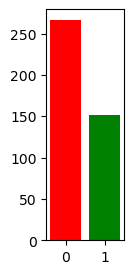

In [11]:
plt.figure(figsize=(1,3))
plt.bar(list(datas['Survived'].value_counts().keys()),list(datas['Survived'].value_counts()),color=('r','g'))
plt.show()

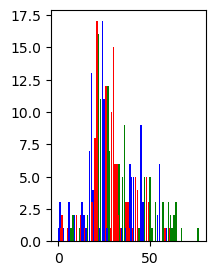

In [12]:
plt.figure(figsize=(2,3))
plt.bar(list(datas['Age'].value_counts().keys()),list(datas['Age'].value_counts()),color=('r','b','g'))
plt.show()

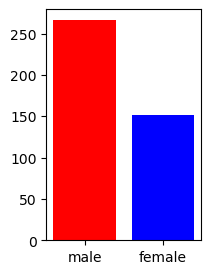

In [13]:
plt.figure(figsize=(2,3))
plt.bar(list(datas['Sex'].value_counts().keys()),list(datas['Sex'].value_counts()),color=('r','b'))
plt.show()

In [15]:
datas['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

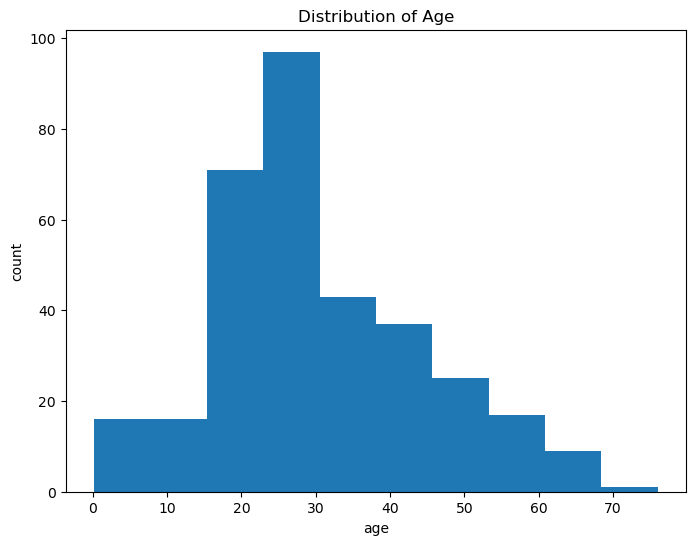

In [16]:
plt.figure(figsize=(8,6))
plt.hist(datas['Age'])
plt.title("Distribution of Age")
plt.xlabel("age")
plt.ylabel("count")
plt.show()


In [17]:
datas['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Survived, Length: 418, dtype: bool

In [22]:
sum(datas['Survived'].isnull())

0

In [23]:
sum(datas['Age'].isnull())

0

In [24]:
datas=datas.dropna()

In [25]:
sum(datas['Age'].isnull())

0

In [27]:
sum(datas['Pclass'].isnull())

0

In [28]:
sum(datas['Sex'].isnull())

0

In [29]:
from sklearn.preprocessing import LabelEncoder
convert= LabelEncoder()
datas['Sex']= convert.fit_transform(datas['Sex'])

datas.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C78,Q
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C


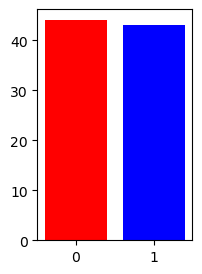

In [30]:
plt.figure(figsize=(2,3))
plt.bar(list(datas['Sex'].value_counts().keys()),list(datas['Sex'].value_counts()),color=('r','b'))
plt.show()

In [26]:
datas['Sex'].value_counts()

0    44
1    43
Name: Sex, dtype: int64

In [31]:
X= datas[['Age', 'Sex']]
Y=datas['Survived']


In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [33]:

from sklearn.linear_model import LogisticRegression

logic= LogisticRegression(random_state = 0)
logic.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [34]:
prediction= print(logic.predict(X_test))

[1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0]


In [35]:
print("PREDICTED ACCURACY:",logic.score(X_test,Y_test))

PREDICTED ACCURACY: 1.0


In [34]:
print(Y_test)

24     1
64     0
252    0
184    1
331    0
131    0
215    0
202    0
378    0
414    1
46     0
114    1
156    1
321    0
48     1
73     0
109    0
287    0
Name: Survived, dtype: int64


In [36]:
import warnings
warnings.filterwarnings("ignore")

predicted= logic.predict([[2,1]])

if(predicted==0):
  print("Not Survived")
else:
  print("Survived")

Not Survived
